<a href="https://colab.research.google.com/github/MRT678GP/git-demo/blob/master/FraudDetection2_ThatoMokokaEDSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded1 = files.upload()

Saving training.csv to training (1).csv


In [6]:
import io
df1 = pd.read_csv(io.StringIO(uploaded1['training.csv'].decode('utf-8')))
df1.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [7]:
uploaded2 = files.upload()

Saving test.csv to test (1).csv


In [8]:
df2 = pd.read_csv(io.StringIO(uploaded2['test.csv'].decode('utf-8')))
df2.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [0]:
Con_data = pd.concat([df1, df2], sort=False)

In [12]:
df1.shape

(95662, 16)

In [13]:
df2.shape

(45019, 15)

In [14]:
Con_data.shape

(140681, 16)

In [15]:
Con_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0.0


In [16]:
Con_data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,140681.0,1.406810e+05,1.406810e+05,140681.000000,95662.000000
mean,256.0,6.050578e+03,1.002851e+04,2.257469,0.002018
std,0.0,1.153134e+05,1.150626e+05,0.735089,0.044872
min,256.0,-2.500000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,3.920000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,3.000000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [17]:
Con_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140681 entries, 0 to 45018
Data columns (total 16 columns):
TransactionId           140681 non-null object
BatchId                 140681 non-null object
AccountId               140681 non-null object
SubscriptionId          140681 non-null object
CustomerId              140681 non-null object
CurrencyCode            140681 non-null object
CountryCode             140681 non-null int64
ProviderId              140681 non-null object
ProductId               140681 non-null object
ProductCategory         140681 non-null object
ChannelId               140681 non-null object
Amount                  140681 non-null float64
Value                   140681 non-null int64
TransactionStartTime    140681 non-null object
PricingStrategy         140681 non-null int64
FraudResult             95662 non-null float64
dtypes: float64(2), int64(3), object(11)
memory usage: 18.2+ MB


In [18]:
Con_data.isnull().values.any()

True

In [0]:
# # Missing Values from https://www.kaggle.com/panamby/loan-default-prediction

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [20]:
missing_values_table(Con_data)

Your selected dataframe has 16 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
FraudResult,45019,32.0


In [0]:
def percent_missing_data(df):
    '''
    Gets the percentage of data missing (where data missing is greater than 0) for every column in the dataframe and provides this information in a barplot 
    
    Parameters
    ----------
    
    df: dataframe
        dataframe object containing the dataframe to be cheacked for missing values.
    
    Returns
    -------
    
    barplot: plot
        barplot of percent of all missing values that are greater than 0.
    '''
    # calculate total isnull values then work out their percentage of total values then concat these into a dataframe
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    # create a mask to remove any columns from dataframe that dont have missing values
    mask = missing_data['Percent'] > 0
    missing_data = missing_data[mask]
    
    
    # plot the the barplot with missing value percentage, and x labels rotated by 90 degrees, on the created axis
    f, ax = plt.subplots(figsize=(15, 12))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data.index, y=missing_data.Percent)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)

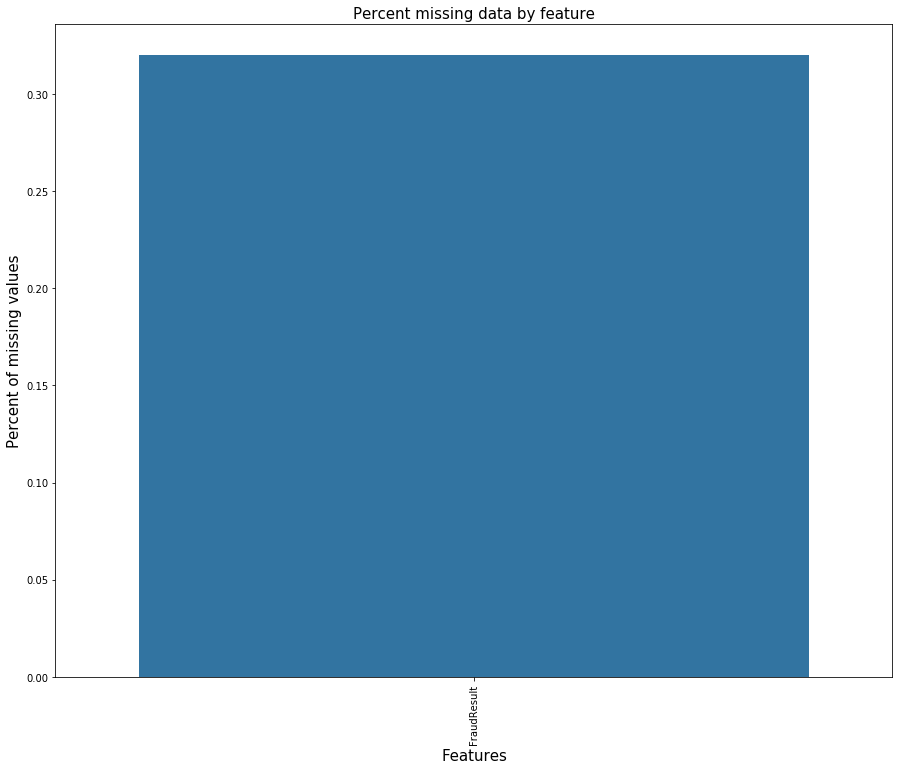

In [27]:
percent_missing_data(Con_data)

In [0]:
import matplotlib.pyplot as plt

In [0]:
import seaborn as sns

In [0]:
def variable_imputation_check(string,df,train_df,response_value,subplots='N',ncols=1,add_rows=1,fig_size=(12,12)):
    '''
    Gets the counts of the categories present, within the various columns, containing the given string. For each of these a countplot or regplot is then displayed.
    
    Parameters
    ----------
    
    string: str
        str object containing the string to select columns from the dataframe.
        
    df: dataframe
        dataframe object containing the datapoints that need to be counted.
        
    train_df: dataframe
        dataframe object containing the original values of the variable that needs to be predicted datapoints that need to be counted.
        
    response_value: str
        str object containing the response varaible from the tainset as a string.
        
    subplots: str (default='N')
        str object containing 'Y' or 'N'. Used if multiple countplots need to be drawn
        
    ncols: int (default=1)
        int value specifiying the amount of columns to create within the sub plot
        
    add_rows: int (default=1)
        int value specifiying the amount of rows to add to the subplot, should they be needed
        
    fig_size: array (default=(12,12))
        array-like object containing the lenght and width of the figure to be drawn in inches
    
    Returns
    -------
    
    countplots: plot
        countplots of column values specified within string.
        
    regplots: plot
        regplots of column values, that have 20 > unique values, against the response variable.
    '''
    
    #create the base dataframe to work with
    String_cols = list([col for col in df.columns if string in col])
    df_string = df[String_cols]

    # if there are going to be subplots
    if subplots == 'Y':
        
        # define number of rows(based on number of items in String_cols), create plot axis and their size
        nrows = int(round((len(String_cols)/ncols),0)+add_rows)
        fig, ax = plt.subplots(nrows=nrows,ncols=ncols)
        fig.set_size_inches(fig_size)
        
        # instantiate count parameter(used in subplot positioning)
        count = 1
        
        # loop through the elements of String_cols
        for x in String_cols:
            
            # if number of categories of x > 20 create a regplot of this category on a given subplot and increase count by 1 
            if len(df[x].unique()) > 16:
                df_string[response_value] = train_df[response_value]
                plt.subplot(nrows,ncols,count)
                sns.regplot(y=df_string[response_value], x=df_string[x])
                count += 1
                
            # if number of categories of x < 20 create a countplot of this category on a given subplot and increase count by 1 
            else:
                plt.subplot(nrows,ncols,count)
                sns.countplot(df_string[x])
                count += 1
                
    # if there are not going to be subplots create a countplot
    else:
        sns.countplot(df[string])  

In [52]:
df1.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [0]:
def ordered_label_encoder(df, col_names, to_replace, replace_values):
    '''
    Replaces the values of data, for the columns in col_list, in the to_replace list with the values present in the replace_values list. These changes are done to the base dataframe.
    
    Parameters
    ----------
    
    df: dataframe
        dataframe object containing the dataframe to be subsetted.
    
    col_names: list
        list_like object containing the list of columns that the replacement must be applied to
        
    to_replace: list
        list_like object containing the measurement scale of the ordinal variable
        
    replace_values: list
        list_like object containing the value scale of the replacement elements
    
    Returns
    -------
    
    df: dataframe
        altered original dataframe.
    '''
    # loop through columns present in col_names
    for col in col_names:
        
        # replace to_replace values with replace_values
        df[col] = df[col].replace(to_replace=to_replace, value=replace_values)

In [0]:
def response_variable_distribution(response_variable, train_df):
    '''
    Gets the distribution, mean and standard deviation of the response variable. Also provides a probability plot of sample data against the quantiles of a 
    specified theoretical distribution as well as providing a best-fit line for the data.
    
    Parameters
    ----------
    
    response_variable: str
        str object containing the response variable in the analysis.
    
    train_df: dataframe
        dataframe object containing the original values of the response variable
    
    Returns
    -------
    
    distplot: plot
        distplot of y variable as well as its mu and sigma values.
    
    probplot: plot
        probplot of y variable as well quantiles and least squares fit.
    '''
    
    # set up the axes figure layout and total size for the plot
    fig, ax = plt.subplots(nrows=1,ncols=2)
    fig.set_size_inches(12, 12)

    # plot the distribution and fitted parameters on the first subplot
    plt.subplot(1,2,1)
    sns.distplot(df1[response_variable] , fit=norm);
    (mu, sigma) = norm.fit(df1[response_variable])
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title(response_variable + ' distribution')

    # plot the the QQ-plot with quantiles and least squares fit on the second subplot
    plt.subplot(1,2,2)
    res = stats.probplot(df1[response_variable], plot=plt)
    plt.show()

In [0]:
from scipy.stats import norm
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
%matplotlib inline

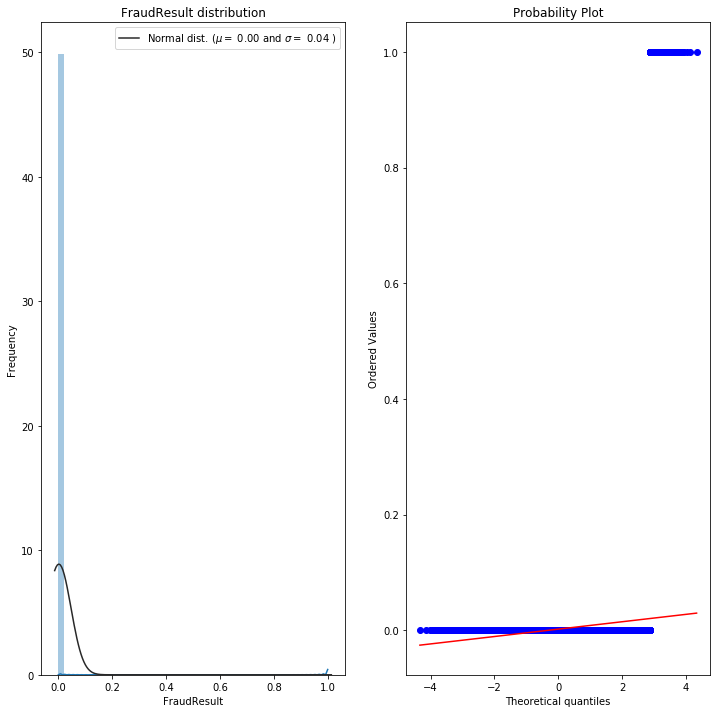

In [39]:
response_variable_distribution('FraudResult',df1)

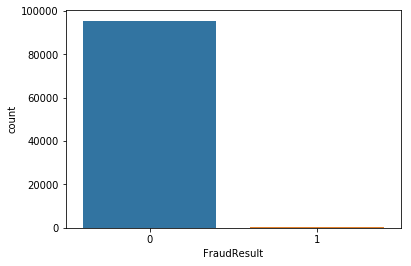

In [46]:
variable_imputation_check('FraudResult',df1,df1,'FraudResult')

In [47]:
#checking the data for missing values
df1.isnull().any()

TransactionId           False
BatchId                 False
AccountId               False
SubscriptionId          False
CustomerId              False
CurrencyCode            False
CountryCode             False
ProviderId              False
ProductId               False
ProductCategory         False
ChannelId               False
Amount                  False
Value                   False
TransactionStartTime    False
PricingStrategy         False
FraudResult             False
dtype: bool

In [48]:
Fraud_values = {0:'Not Fraud', 1:'Fraud'}
print(df1.FraudResult.value_counts().rename(index = Fraud_values))

Not Fraud    95469
Fraud          193
Name: FraudResult, dtype: int64


In [0]:
#Total number of fraud transactions
Fraud_dist = df1['FraudResult'].value_counts()

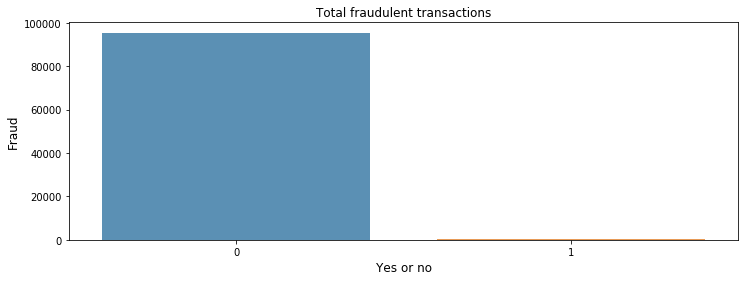

In [50]:
#Check the ditribution of fraud
plt.figure(figsize=(12,4))
sns.barplot(Fraud_dist.index, Fraud_dist.values, alpha=0.8)
plt.ylabel('Fraud', fontsize=12)
plt.xlabel('Yes or no', fontsize=12)
plt.title('Total fraudulent transactions')
plt.show()

In [0]:
from imblearn.over_sampling import SMOTE

In [53]:
df1["CurrencyCode"].value_counts()

UGX    95662
Name: CurrencyCode, dtype: int64

In [54]:
df1["CountryCode"].value_counts()

256    95662
Name: CountryCode, dtype: int64

In [55]:
df1["ProviderId"].value_counts()

ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: ProviderId, dtype: int64

In [57]:
df1["ProductId"].value_counts()

ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
ProductId_4      2403
ProductId_21     1512
ProductId_11     1377
ProductId_19      965
ProductId_14      789
ProductId_13      296
ProductId_2       236
ProductId_20      216
ProductId_8       197
ProductId_24      175
ProductId_22      112
ProductId_7        86
ProductId_27       31
ProductId_5        25
ProductId_9        17
ProductId_16       10
ProductId_12        2
ProductId_23        1
Name: ProductId, dtype: int64

In [58]:
df1["ProductCategory"].value_counts()

financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: ProductCategory, dtype: int64

In [59]:
df1["ChannelId"].value_counts()

ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: ChannelId, dtype: int64

In [60]:
df1["PricingStrategy"].value_counts()

2    79848
4    13562
1     1867
0      385
Name: PricingStrategy, dtype: int64

In [0]:
from sklearn import preprocessing

In [0]:
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()

In [65]:
le.fit_transform(df1['ProductId'])

array([ 1, 19,  0, ..., 19,  8, 19])

In [0]:
# Separate input features and target
y = df1['FraudResult']
X = df1.drop('FraudResult', axis=1)

In [0]:
from sklearn.model_selection import train_test_split
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [0]:
df1['TransactionId'] = df1['TransactionId'].map(lambda x: x.lstrip('+-').rstrip('TransactionId'))

In [0]:
df1['TransactionId'] = df1['TransactionId'].map(lambda x: x.lstrip('+-').rstrip('_'))

In [83]:
df1.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [0]:
df1['BatchId'] = df1['BatchId'].str.strip("BatchId")

In [0]:
df1['BatchId'] = df1['BatchId'].str.strip("_")

In [86]:
df1.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [0]:
df1['AccountId'] = df1['AccountId'].str.strip("AccountId")
df1['AccountId'] = df1['AccountId'].str.strip("_")

In [88]:
df1.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,36123,3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,15642,4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,53941,4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,102363,648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,38780,4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [0]:
df1['SubscriptionId'] = df1['SubscriptionId'].str.strip("SubscriptionId")
df1['SubscriptionId'] = df1['SubscriptionId'].str.strip("_")

In [0]:
df1['CustomerId'] = df1['CustomerId'].str.strip("CustomerId")
df1['CustomerId'] = df1['CustomerId'].str.strip("_")

In [0]:
df1['TransactionId'] = df1['TransactionId'].str.strip("TransactionId")
df1['TransactionId'] = df1['TransactionId'].str.strip("_")
df1["TransactionId"]= df1["TransactionId"].astype(int)

In [106]:
df1.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,76871,36123,3957,887,4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49,2,0
1,73770,15642,4841,3829,4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08,2,0
2,26203,53941,4229,222,4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21,2,0
3,380,102363,648,2185,988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55,2,0
4,28195,38780,4841,3829,988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21,2,0


In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
TransactionId           95662 non-null object
BatchId                 95662 non-null int64
AccountId               95662 non-null int64
SubscriptionId          95662 non-null int64
CustomerId              95662 non-null int64
CurrencyCode            95662 non-null object
CountryCode             95662 non-null int64
ProviderId              95662 non-null object
ProductId               95662 non-null object
ProductCategory         95662 non-null object
ChannelId               95662 non-null object
Amount                  95662 non-null float64
Value                   95662 non-null int64
TransactionStartTime    95662 non-null object
PricingStrategy         95662 non-null int64
FraudResult             95662 non-null int64
dtypes: float64(1), int64(8), object(7)
memory usage: 11.7+ MB


In [0]:
df1["BatchId"]= df1["BatchId"].astype(int) 
df1["AccountId"]= df1["AccountId"].astype(int)
df1["SubscriptionId"]= df1["SubscriptionId"].astype(int) 
df1["CustomerId"]= df1["CustomerId"].astype(int)

In [0]:
df1['TransactionStartTime'] = df1['TransactionStartTime'].str.strip("..T..")
df1['TransactionStartTime'] = df1['TransactionStartTime'].str.strip("Z")

In [103]:
df1.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,36123,3957,887,4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49,2,0
1,TransactionId_73770,15642,4841,3829,4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08,2,0
2,TransactionId_26203,53941,4229,222,4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21,2,0
3,TransactionId_380,102363,648,2185,988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55,2,0
4,TransactionId_28195,38780,4841,3829,988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21,2,0


In [0]:
#Encoding a couple of columns from https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [0]:
from sklearn.preprocessing import LabelEncoder
df1_trans = MultiColumnLabelEncoder(columns = ['CurrencyCode','CountryCode','ProviderId','ProductId','ProductCategory','ChannelId','PricingStrategy']).fit_transform(df1)

In [0]:
from imblearn.over_sampling import SMOTE
# Separate input features and target
y = df1_trans.FraudResult
X = df1_trans.drop('FraudResult', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [111]:
df1.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,76871,36123,3957,887,4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49,2,0
1,73770,15642,4841,3829,4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08,2,0
2,26203,53941,4229,222,4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21,2,0
3,380,102363,648,2185,988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55,2,0
4,28195,38780,4841,3829,988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21,2,0


In [121]:
df1_trans.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult
0,76871,36123,3957,887,4406,0,0,5,1,0,2,1000.0,1000,2,0
1,73770,15642,4841,3829,4406,0,0,3,19,2,1,-20.0,20,2,0
2,26203,53941,4229,222,4683,0,0,5,0,0,2,500.0,500,2,0
3,380,102363,648,2185,988,0,0,0,11,8,2,20000.0,21800,2,0
4,28195,38780,4841,3829,988,0,0,3,19,2,1,-644.0,644,2,0


In [0]:
df1_trans['TransactionStartTime'] = pd.to_datetime(df1_trans['TransactionStartTime'])

In [0]:
df1_trans = df1_trans.drop(['TransactionStartTime'], axis=1)

In [0]:
from sklearn.linear_model import LogisticRegression

smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)


In [127]:
from sklearn.metrics import classification_report, accuracy_score, log_loss
# Checking accuracy
accuracy_score(y_test, smote_pred)

0.9915537715337013

In [0]:
#Final Submission
data = df1[['TransactionId']]
df1_trans['FraudResult']= y
data.to_csv('submission.csv',index=False)